# Copyright

<PRE>
This notebook was created as part of the "Deep learning / VITMMA19" class at
Budapest University of Technology and Economics, Hungary,
https://portal.vik.bme.hu/kepzes/targyak/VITMMA19.

Any re-use or publication of any part of the notebook is only allowed with the
written consent of the authors.

2024 (c) Mohammed Salah Al-Radhi (malradhi@tmit.bme.hu)
</PRE>

# Regression example
This Jupyter Notebook contains a basic example of regression with linear regression, random forest and a deep neural network. The dataset we will use is the insurance dataset, which contains information about individuals and their medical insurance costs. We will preprocess the data, visualize it, and train different models on it. Finally, we will evaluate the models and compare their performance.
First, we install [Pytorch Lightning](https://lightning.ai/), which will be used as an easy-to-use interface to PyTorch.


In [1]:
!pip install pytorch-lightning --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 18.0 MB/s eta 0:00:00


## Data
Download the dataset:

In [2]:
!wget https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

--2024-10-30 21:34:06--  https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54288 (53K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  53.02K  --.-KB/s    in 0.009s  

2024-10-30 21:34:06 (5.67 MB/s) - ‘insurance.csv’ saved [54288/54288]



## Imports
Importing libraries for data preprocessing & visualization:

In [3]:
import pandas as pd # pandas for data manipulation
import numpy as np # numpy for linear algebra
import matplotlib.pyplot as plt # matplotlib for plotting
import seaborn as sns # seaborn for plotting

## DATA PREPROCESSING AND VISUALIZATION

A `df` dataframe is created by reading the contents of the "insurance.csv" file using pandas `read_csv()` method. The "insurance.csv" file contains information about individuals and their medical insurance costs. The `df` dataframe contains 1338 rows and 7 columns. Each row represents an individual and each column represents a feature of that individual such as age, sex, bmi, number of children, smoker or not, region and charges.

In [4]:
df = pd.read_csv("insurance.csv")
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


We have the column names already. There are no 'NaN' values in any of the columns.

The categorical columns contains strings, which have to convert to one-hot vectors. Fortunately, we can easily do this with pandas:

In [5]:
df = pd.get_dummies(df, drop_first=True) # we have to talk about drop_first -> avoid the dummy variable trap
## Gender to 2 columns (Male and Female) -> One is enough

## Understand the distribution after encoding
print(df.describe())

print(df.dtypes)

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
age                   int64
bmi                 float64
children              int64
charges             float64
sex_male               bool
smoker_yes             bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object


In [6]:
# df.iloc[:, :4] = df.iloc[:, :4].astype('float32')

# Convert the last 5 columns from bool to int
df.iloc[:, -5:] = df.iloc[:, -5:].astype(int);

<ipython-input-6-8d06bbe903fd>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex_male, Length: 1338, dtype: int64' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.iloc[:, -5:] = df.iloc[:, -5:].astype(int);
<ipython-input-6-8d06bbe903fd>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker_yes, Length: 1338, dtype: int64' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.iloc[:, -5:] = df.iloc[:, -5:].astype(int);
<ipython-input-6-8d06bbe903fd>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise 

In [7]:
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


The following part generates a "heatmap" of pairwise correlations between the features in the `df` dataframe. The `sns.heatmap()` function from the seaborn library is used to create the heatmap. The `annot=True` parameter adds the correlation values to the heatmap.

Pairwise correlation is a measure of the linear relationship between two variables. In the context of linear regression, pairwise correlation is important because it helps us understand how each feature is related to the target variable. If two features are highly correlated, it means that they are providing similar information to the model, which can lead to overfitting. On the other hand, if two features are not correlated, it means that they are providing different information to the model, which can improve the model's performance. Therefore, it is important to check the pairwise correlations between the features before training a linear regression model.

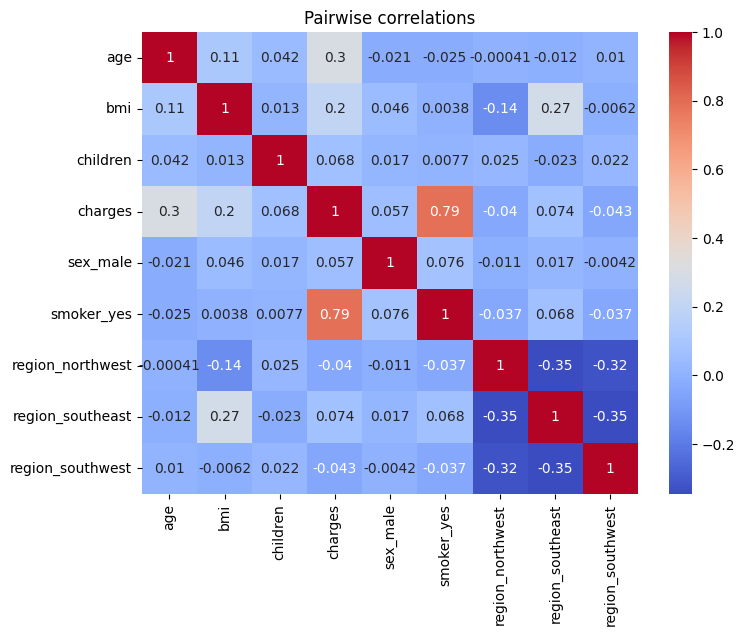

In [8]:
plt.figure(figsize=(8, 6))
plt.title('Pairwise correlations')
sns.heatmap(data=df.corr(), annot=True, cmap = 'coolwarm')
plt.show()

## Training linear regression and random forest regressors

We split the features and the target variable:


In [9]:
X = df.drop(columns=['charges']).values # features
y = df['charges'].values # label

Now we split the dataset into train and test sets, and train linear regression and random forest regressors on the test set.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # alternative: min-max scaling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# scaler.fit(X_train)

## fit_transform does two things in one step: it fits the scaler to X_train (calculates the mean and standard deviation based on X_train data) ,
## and then transforms X_train (scales it according to the calculated mean and standard deviation).
## This is crucial because the scaler learns the scaling parameters (mean and std) from the training data only, preventing information from the test set from leaking into the training process.

# transform(X_test):

# transform applies the already calculated scaling parameters (from X_train) to scale X_test.
#   Here, the scaler only transforms X_test without refitting it, meaning it does not calculate new mean and standard deviation from X_test. This ensures the model evaluates the test data consistently with the training data’s scale.

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Standardized training data
X_test = scaler.transform(X_test)  # Apply same scaling to test data


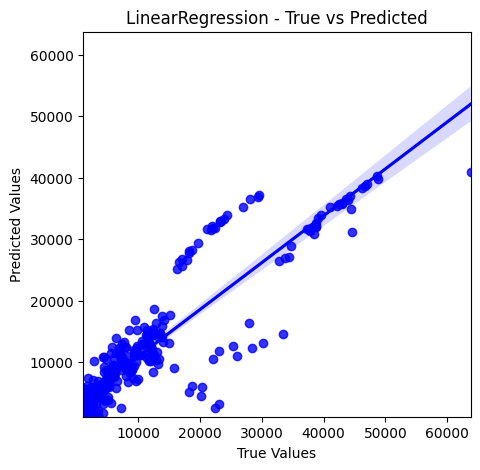

LinearRegression - Mean Absolute Error: 4181.19
LinearRegression - R^2 Score: 0.78


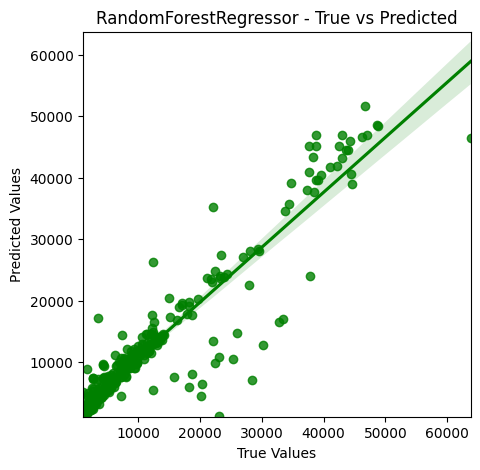

RandomForestRegressor - Mean Absolute Error: 2550.23
RandomForestRegressor - R^2 Score: 0.87


In [11]:
results = []
# Train and evaluate models
for model in [LinearRegression(), RandomForestRegressor()]:
    # Model training
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Save predictions
    np.save(f"{model.__class__.__name__}_predictions.npy", y_pred)

    # Plot regression results
    plt.figure(figsize=(5, 5))
    sns.regplot(x=y_test, y=y_pred, scatter=True, color='b' if model.__class__.__name__ == "LinearRegression" else 'g')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.xlim([min(y_test), max(y_test)])
    plt.ylim([min(y_test), max(y_test)])
    plt.title(f"{model.__class__.__name__} - True vs Predicted")
    plt.show()

    # Calculate and display evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model.__class__.__name__} - Mean Absolute Error: {mae:.2f}")
    print(f"{model.__class__.__name__} - R^2 Score: {r2:.2f}")

    # Append results to the list
    results.append({
        'Model': model.__class__.__name__,
        'MAE': mae,
        'R^2': r2
    })

In [24]:
# random forest model explains a larger proportion of variance compared to linear regression.
# This is expected, as random forests are better suited for capturing nonlinear relationships and interactions between features.

import os

# Creating a directory to save model checkpoints t
checkpoint_dir = '/content/model_checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Save results to CSV in the results directory
results_df.to_csv(os.path.join(checkpoint_dir, 'initial_model_evaluation_results.csv'), index=False)

print(f"Model evaluation results saved to {os.path.join(checkpoint_dir, 'initial_model_evaluation_results.csv')}")

Model evaluation results saved to /content/model_checkpoints/initial_model_evaluation_results.csv


## **ASSIGNMENT**: Regression with neural network

Your tasks are the following.


---


1. Create and train a FeedForward Neural Network with PyTorch Lightning. Use ModelCheckPoint as callback, and save the best performing model (in terms of MAE) into a ckpt file named *best_model.ckpt*. 50 points


---


2. Save the MAE and the R2 score of your best performing model into a csv file called *mlp_results.csv*. The MAE must be lower and the R2 score must be higher than in linear regression. 20 points.


---


3. Ensemble your neural network model with RandomForestRegressor following the formula
`y_pred_ensemble = 0.5 * y_pred_FeedForwardNet + 0.5 * y_pred_RandomForestRegressor`.
Save the MAE and the R2 score of the ensemble into a csv file called *ensemble_results.csv*.  30 points


---


Besides the Python codes / IPYNB, the CSV files must be saved directly into the git repository you submit.


Some thoughts on ensembles:
*   https://en.wikipedia.org/wiki/Ensemble_learning
*   https://ensemble-pytorch.readthedocs.io/
*   https://arxiv.org/abs/2106.03253

# TASK **1**

In [13]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
import torch.nn.functional as F
import torchmetrics

In [14]:
# Convert to tensors for the neural network
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [15]:
class Feedforward(pl.LightningModule):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):
        super(Feedforward, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])  # First hidden layer
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])  # Second hidden layer
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])  # Third hidden layer
        self.fc4 = nn.Linear(hidden_dims[2], 1)  # Output layer for regression

        self.dropout = nn.Dropout(dropout_rate)  # Dropout layer
        self.r2_score = torchmetrics.R2Score()  # R² score metric

    def forward(self, x):
        x = self.dropout(F.relu(self.fc1(x)))  # First layer
        x = self.dropout(F.relu(self.fc2(x)))  # Second layer
        x = self.dropout(F.relu(self.fc3(x)))  # Third layer
        return self.fc4(x).squeeze(1)  # Return the output

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = nn.L1Loss()(y_hat, y)  # Mean Absolute Error
        self.log('train_loss', loss)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = nn.L1Loss()(y_hat, y)  # Mean Absolute Error
        self.log('val_loss', loss)

        # Calculate R² Score
        r2 = self.r2_score(y_hat, y)
        self.log('val_r2', r2)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=0.001)  # Adam optimizer with a learning rate of 0.001
        return optimizer

In [16]:
# Number of training features
input_dim = X_train.shape[1]
model = Feedforward(input_dim)

# Define ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    monitor='val_loss',
    mode='min',
    save_top_k=1,
    filename='best_model',
    dirpath=checkpoint_dir
)


In [17]:
# Data Loader preparation
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Creating a validation dataset
val_dataset = TensorDataset(X_test_tensor, y_test_tensor)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Training the model
trainer = pl.Trainer(callbacks=[checkpoint_callback], max_epochs=30)
trainer.fit(model, train_loader, val_loader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/model_checkpoints exists and is not empty.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name     | Type    | Params | Mode 
---------------------------------------------
0 | fc1      | Linear  | 1.2 K  | train
1 | fc2      | Linear  | 8.3 K  | train
2 | fc3      | Linear  | 2.1 K  | train
3 | fc4      | Linear  | 33     | train
4 | dropout  | Dropout | 0      | train
5 | r2_score | R2Score | 0      | train
---------------------------------------------
11.5 K    Trainable params
0         Non-trainable params
11.5 K    Total params
0.046

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (34) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.


# TASK 2

In [18]:
# Load the best model
best_model = Feedforward.load_from_checkpoint(
    os.path.join(checkpoint_dir, 'best_model.ckpt'),
    input_dim=input_dim)

# Set the model to evaluation mode
best_model.eval()

# Move the input tensor to the same device as the model
X_test_tensor = X_test_tensor.to(next(best_model.parameters()).device)

with torch.no_grad():  # No need to track gradients during evaluation
    y_pred = best_model(X_test_tensor).cpu().numpy()  # Get predictions and move to CPU

# Calculate metrics consistently
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R² Score: {r2:.2f}')


Mean Absolute Error (MAE): 3088.77
R² Score: 0.80


In [25]:
new_results_df = pd.DataFrame({
    'Model': ['FeedForwardNN'],
    'MAE': [mae],
    'R^2': [r2]
})

# Append the FFNN results to the existing results DataFrame using pd.concat
results_df = pd.concat([results_df, new_results_df], ignore_index=True)

print(f"MLP results saved to {os.path.join(checkpoint_dir, 'mlp_results.csv')}")
print("Final Model Evaluation Results:")
print(results_df)

# Save results to CSV in the results directory
results_df.to_csv(os.path.join(checkpoint_dir, 'final_NN_model_evaluation_results_alongwith_LR_and_RF.csv'), index=False)

MLP results saved to /content/model_checkpoints/mlp_results.csv
Final Model Evaluation Results:
                   Model          MAE       R^2
0       LinearRegression  4181.194474  0.783593
1  RandomForestRegressor  2550.228686  0.865364
2          FeedForwardNN  3088.771442  0.801113


# TASK 3

In [27]:
# Loading predictions from the Random Forest model
rf_predictions = np.load('RandomForestRegressor_predictions.npy')

# Ensemble the predictions
y_pred_ensemble = 0.5 * y_pred + 0.5 * rf_predictions

# Calculating MAE and R² for the ensemble
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

# Prepare results for saving
ensemble_results = {
    'MAE': [mae_ensemble],
    'R2 Score': [r2_ensemble]
}

# Create a DataFrame and save to CSV
ensemble_results_df = pd.DataFrame(ensemble_results)
ensemble_results_df.to_csv(os.path.join(checkpoint_dir, 'ensemble_results.csv'), index=False)

print("Ensemble MAE and R² Score saved to ensemble_results.csv")




Ensemble MAE and R² Score saved to ensemble_results.csv


In [28]:
ensemble_results_df

,MAE,R2 Score
0,2477.059343,0.865496
